In [8]:
from nutils import*
import numpy as np
import image_based_analysis as im

In [10]:
ns = function.Namespace()
shape = [10, 10] 
A = np.array([0, 0])
B = np.array([1, 1])
topo, ns.x = im.Rectilinear(A, B, shape)

In [11]:
center = (A + B) / 2
radius = np.linalg.norm(0.2 * (B - A))
ns.sdf = (ns.x[0] - center[0])**2 + (ns.x[1] - center[1])**2 - radius**2

In [12]:
nref = 3
rtopo = im.RefineVoxelMeshBySDF(topo, ns.sdf, nref)

In [13]:
gauss = topo.sample('gauss', 2)
gauss_located = im.locatesample(gauss, ns.x, rtopo, ns.x, 1e-7)

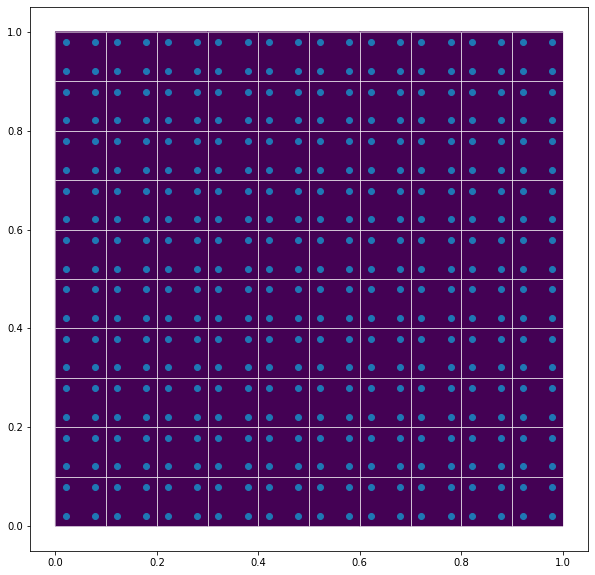

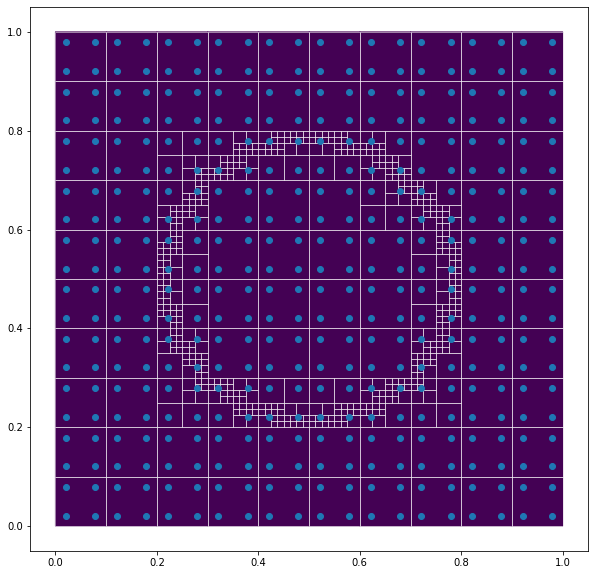

In [14]:
fig, ax = im.CreatePlot()
im.PlotMesh(ax, topo, ns.x)
im.PlotMeshWireframe(ax, topo, ns.x)
gpts = gauss.eval(ns.x)
ax.plot(gpts[:,0], gpts[:,1], 'o')

fig, ax = im.CreatePlot()
im.PlotMesh(ax, rtopo, ns.x)
im.PlotMeshWireframe(ax, rtopo, ns.x)
gpts = gauss.eval(ns.x)
ax.plot(gpts[:,0], gpts[:,1], 'o')

In [15]:
gauss = rtopo.sample('gauss', 2)
gauss_located = im.locatesample(gauss, ns.x, topo, ns.x, 1e-7)

solve > solving 4 dof system to machine precision using arnoldi solver
solve > solver returned with residual 7e-15
geom0 = [6.02768206e-15 5.59096473e-15]
scale = [0.1 0.1]
index = Array<2>
locate detected linear geometry: x = [6.02768206e-15 5.59096473e-15] + [0.1 0.1] xi ~+7.8e-15


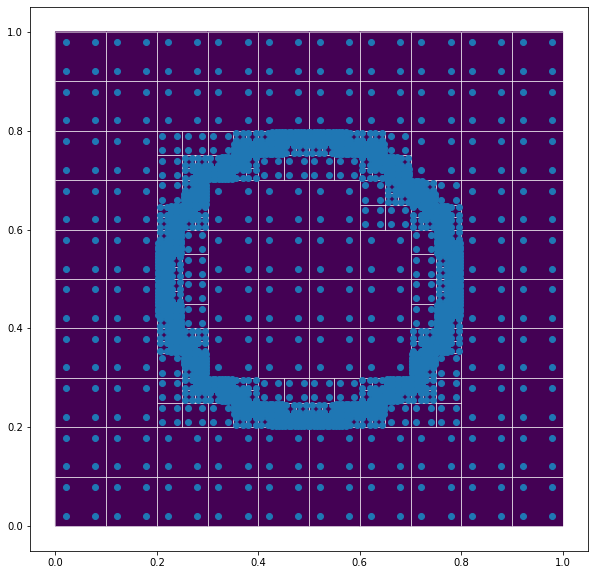

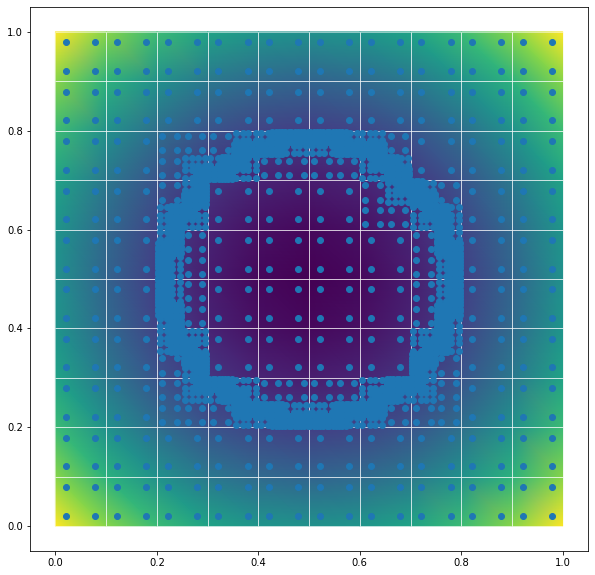

In [23]:
fig, ax = im.CreatePlot()
im.PlotMesh(ax, rtopo, ns.x)
im.PlotMeshWireframe(ax, rtopo, ns.x)
gpts = gauss.eval(ns.x)
ax.plot(gpts[:,0], gpts[:,1], 'o')

fig, ax = im.CreatePlot()
im.PlotMesh(ax, topo, ns.x, f=ns.sdf)
im.PlotMeshWireframe(ax, topo, ns.x)
gpts = gauss_located.eval(ns.x)
ax.plot(gpts[:,0], gpts[:,1], 'o')

In [54]:
ns.s = 'sign(sdf)'

In [28]:
shape = [5, 5] 
omega = function.Namespace()
omega_topo, omega.x = im.Rectilinear(A, B, shape)

center = (A + B) / 2
radius = np.linalg.norm(0.2 * (B - A))
omega.sdf = (omega.x[0] - center[0])**2 + (omega.x[1] - center[1])**2 - radius**2

nrefine = 1
omega_rtopo = im.RefineVoxelMeshBySDF(omega_topo, omega.sdf, nrefine)

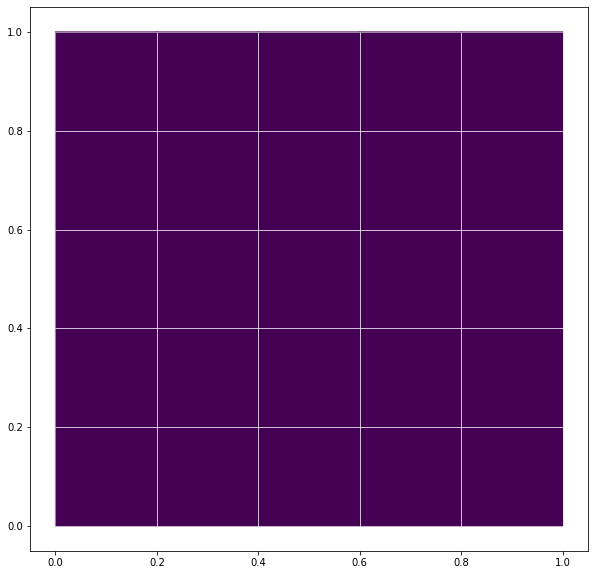

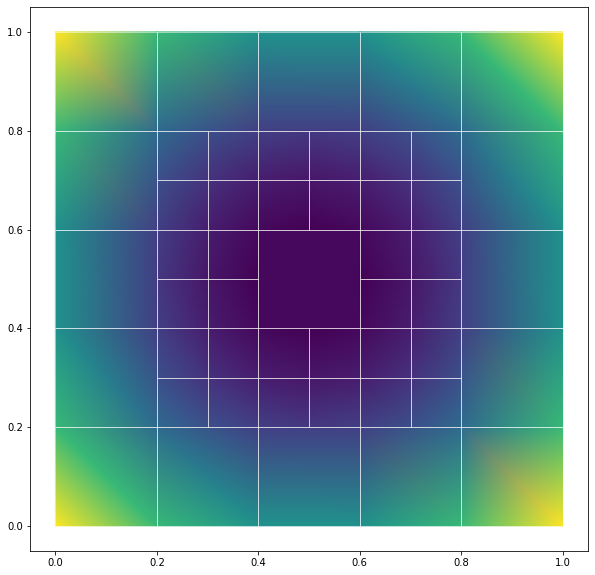

In [29]:
fig, ax = im.CreatePlot()
im.PlotMesh(ax, omega_topo, omega.x)
im.PlotMeshWireframe(ax, omega_topo, omega.x)

fig, ax = im.CreatePlot()
im.PlotMesh(ax, omega_rtopo, omega.x, f=omega.sdf)
im.PlotMeshWireframe(ax, omega_rtopo, omega.x)

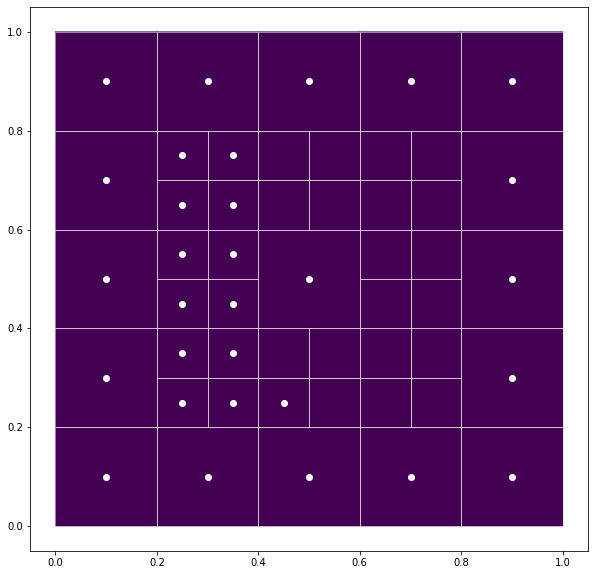

In [46]:
# testing nutils cell array ordering convention

ielems = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29], dtype=int)
xis = np.array([[0.5, 0.5]] * len(ielems), dtype=float)

cells = omega_rtopo._sample(ielems, xis)

fig, ax = im.CreatePlot()
im.PlotMesh(ax, omega_rtopo, omega.x)
im.PlotMeshWireframe(ax, omega_rtopo, omega.x)
pts = cells.eval(omega.x)
ax.plot(pts[:,0], pts[:,1], 'wo')

In [ ]:
def FindElementsToRefine(topo, sdf, delta=0.0):
    dim = topo.ndims
    elems_to_refine = []
    k = 0
    bez = refined_topo.sample('bezier',2)
    sd = bez.eval(sdf)
    sd[np.abs(sd) < delta] = 0
    sd = sd.reshape( [len(sd)//2**dim, 2**dim] )
    for i in range(len(sd)):
        if np.any(np.not_equal(np.sign(sd[i,:]),np.sign(sd[i,0]))) or np.any(np.equal(np.sign(sd[i,:]),0)):
            elems_to_refine.append(k)
        k = k + 1
    return elems_to_refine

def RefineElementsF(topo, elements_to_refine):
    return topo.refined_by(topo.transforms[np.array(elems_to_refine)])


def LocateSampleOnHeirarchicalLinearMesh(fromsample, fromgeom, totopo, geom0, scale, refined_elems):
    pts = fromsample.eval(fromgeom)
    xis = ( pts - geom0 ) / scale

In [51]:
fromsample = omega_topo.sample('gauss', 2)
fromgeom = omega.x

geom0, scale = im.GetAffineTransformation(omega_topo, omega.x)
pts = fromsample.eval(fromgeom)
xis = ( pts - geom0 ) / scale

print(scale)
print(geom0)
print(xis)

[0.2 0.2]
[0. 0.]
[[0.21132487 0.21132487]
 [0.21132487 0.78867513]
 [0.78867513 0.21132487]
 [0.78867513 0.78867513]
 [0.21132487 1.21132487]
 [0.21132487 1.78867513]
 [0.78867513 1.21132487]
 [0.78867513 1.78867513]
 [0.21132487 2.21132487]
 [0.21132487 2.78867513]
 [0.78867513 2.21132487]
 [0.78867513 2.78867513]
 [0.21132487 3.21132487]
 [0.21132487 3.78867513]
 [0.78867513 3.21132487]
 [0.78867513 3.78867513]
 [0.21132487 4.21132487]
 [0.21132487 4.78867513]
 [0.78867513 4.21132487]
 [0.78867513 4.78867513]
 [1.21132487 0.21132487]
 [1.21132487 0.78867513]
 [1.78867513 0.21132487]
 [1.78867513 0.78867513]
 [1.21132487 1.21132487]
 [1.21132487 1.78867513]
 [1.78867513 1.21132487]
 [1.78867513 1.78867513]
 [1.21132487 2.21132487]
 [1.21132487 2.78867513]
 [1.78867513 2.21132487]
 [1.78867513 2.78867513]
 [1.21132487 3.21132487]
 [1.21132487 3.78867513]
 [1.78867513 3.21132487]
 [1.78867513 3.78867513]
 [1.21132487 4.21132487]
 [1.21132487 4.78867513]
 [1.78867513 4.21132487]
 [1.788

In [53]:
a = 2.2
b = np.floor(a)